# Analysis Workshop Week 2 Notebook

This week we'll be going through and doing some waveform processing examples together as a group.

## Step 1: Importing nabPy and deltarice libraries

On the GT cluster (or on your personal computer) you need to add both of these to your PYTHONPATH variable. 

You can do this via bash script, or you can do it the way I show below here. If you're on the GT cluster, I recommend this method instead because I've noticed that system variables like PYTHONPATH can be reset when you submit new jobs. 

Basically what this does is tells the Python import system where to look for libraries and you're giving it a new location to find deltarice and also nabPy. Note that pyNab is nabPy and vice-versa. There was a name change at one point for pip reasons. 

In [2]:
import sys
import os
# userpath = os.path.expanduser('~')
# sys.path.append(userpath+"/p-nab/deltarice/build/lib.linux-x86_64-3.9")
# sys.path.append(userpath+"/p-nab/pyNab/src/")
sys.path.append("/Volumes/Everything/NPET/NABwork/deltarice/build/lib.macosx-11.1-arm64-cpython-39")
sys.path.append("/Volumes/Everything/NPET/NABwork/pyNab/src/")
import nabPy as Nab

## What is nabPy and what does it include?

nabPy is three things:
- A collection of classes to help with reading the data files
- A collection of standard analysis functions, mostly waveform processing related
- Incomplete: It needs work! Plenty of places to improve things and develop if you want something to work on. 

In [3]:
#currentDirectory = os.getcwd()
# run = Nab.DataRun('/storage/home/hcoda1/9/dmathews33/p-nab/AnalysisWorkshops/files/', 3451)
run = Nab.DataRun('/Volumes/Everything/NPET/getting started code/', 3516)

## A class for each data type basically

- Parameters = run.parameterFile()
- Triggers = run.triggers()
- events = currently broken do not use :(
- waveforms
    - singles = run.singleWaves()
    - coincidences = run.coincWaves()
    - baselines = run.noiseWaves()
    - pulsers = run.pulsrWaves()
    - cosmics = not currently implemented, anybody want to do that?

In [4]:
triggers = run.triggers()
triggers.resetCuts()
triggers.defineCut('pixel', '=', 119)
triggers.defineCut('energy', 'between', 10, 30)
pixel119 = triggers.triggers()

In [5]:
singles = run.singleWaves()
singles.headers()

,result,bc,timestamp,req,event type,hit type,blank,eventid,checksum,board,channel,unix timestamp,pixel
0,1,23,2823165215974,2823179168396,0,0,0,419,2059865232,2,7,4.225448e+17,116
1,1,43,2823164948846,2823179197470,0,0,0,420,2877103262,5,3,4.225448e+17,64
2,1,43,2823164982386,2823179222606,0,0,0,421,3882941308,5,3,4.225448e+17,64
3,1,43,2823164994866,2823179247742,0,0,0,422,96533804,5,3,4.225448e+17,64
4,1,43,2823165053766,2823179272946,0,0,0,423,1643792359,5,3,4.225448e+17,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265342,1,217,2831478947902,2831482797596,0,0,0,357483,459125848,27,1,4.225448e+17,1082
265343,1,211,2831479098726,2831482806114,0,0,0,357484,3395580413,26,3,4.225448e+17,1065
265344,1,189,2831479214732,2831482810110,0,0,0,357485,2093666155,23,5,4.225448e+17,1052
265345,1,189,2831479219322,2831482835218,0,0,0,357486,3343935807,23,5,4.225448e+17,1052


In [58]:
coin = run.coincWaves()
coin.defineCut('pixel', '=', 119)
coin.headers()
# coin = coin.waves()

,result,bc,timestamp,req,event type,hit type,blank,eventid,checksum,board,channel,unix timestamp,pixel
19,1,5,2823145667488,2823170896802,1,2,0,10,117517634,0,5,4.225448e+17,119
86,1,5,2823172958696,2823184818034,1,0,0,1164,162684091,0,5,4.225448e+17,119
109,1,5,2823175801876,2823185013544,1,0,0,1174,2223041446,0,5,4.225448e+17,119
343,1,5,2823227008774,2823229567802,1,2,0,3622,3046041428,0,5,4.225448e+17,119
375,1,5,2823233606380,2823235414730,1,2,0,3874,1965451317,0,5,4.225448e+17,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37574,1,5,2831268220818,2831271636112,1,2,0,348257,1721530520,0,5,4.225448e+17,119
37681,1,5,2831286867926,2831289454924,1,2,0,349032,1112460064,0,5,4.225448e+17,119
37880,1,5,2831331366222,2831334589506,1,2,0,350915,521630983,0,5,4.225448e+17,119
37934,1,5,2831341968408,2831344652528,1,2,0,351423,4059781471,0,5,4.225448e+17,119


In [59]:
for i in range(10):
    Nab.plt.plot(coin[i])
    Nab.plt.xlim(3000, 4000)
    Nab.plt.show()

TypeError: 'waveformFile' object is not subscriptable

In [19]:
pulsers = run.pulsrWaves().waves()
print(pulsers)

None


In [45]:
singles.resetCuts()
singles.defineCut('pixel', '=', 64)
waveforms = singles.waves()

In [19]:
help(singles.waves().compute)

Help on method compute in module dask.base:

compute(**kwargs) method of dask.array.core.Array instance
    Compute this dask collection
    
    This turns a lazy Dask collection into its in-memory equivalent.
    For example a Dask array turns into a NumPy array and a Dask dataframe
    turns into a Pandas dataframe.  The entire dataset must fit into memory
    before calling this operation.
    
    Parameters
    ----------
    scheduler : string, optional
        Which scheduler to use like "threads", "synchronous" or "processes".
        If not provided, the default is to check the global settings first,
        and then fall back to the collection defaults.
    optimize_graph : bool, optional
        If True [default], the graph is optimized before computation.
        Otherwise the graph is run as is. This can be useful for debugging.
    kwargs
        Extra keywords to forward to the scheduler function.
    
    See Also
    --------
    dask.compute



In [46]:
singles.waves()

dask.array<astype, shape=(141960, 7000), dtype=float32, chunksize=(5063, 7000), chunktype=numpy.ndarray>

## Some basic signal processing with nabPy

Let's start with the trapezoidal filter because it's the standard

In [7]:
singles.resetCuts()
waveforms = singles.waves().compute()

In [20]:
waveforms

array([[-57., -35., -17., ..., -40., -51., -47.],
       [-55., -62., -64., ..., -51., -46., -47.],
       [-71., -67., -63., ..., -46., -65., -81.],
       ...,
       [-23., -13.,   5., ...,  21.,  35.,  41.],
       [592., 594., 607., ...,  -7., -10.,  -4.],
       [ -1., -17., -23., ..., 101.,  93., 100.]], dtype=float32)

In [ ]:
parameters = run.parameterFile()
parameters.BoardChannelPixelMap

In [ ]:
parameters.FilterParameters

In [ ]:
for i in range(100):
    Nab.plt.plot(waveforms[i])
    Nab.plt.show()

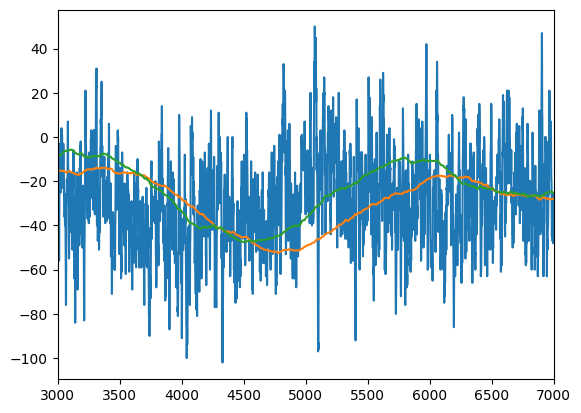

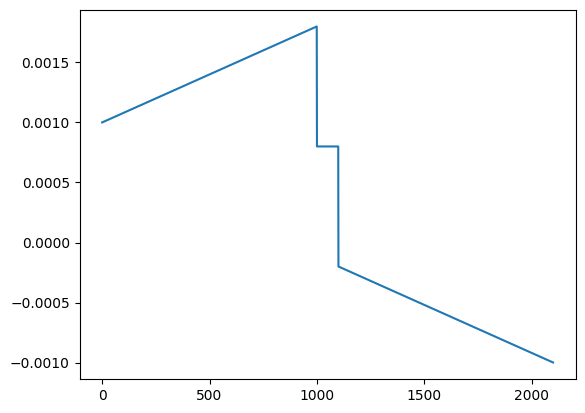

In [82]:
testWave = waveforms[152]

rise = 1250 #this is tunable
top = 100 #remember multiply by 4 to get ns
tau = 1250 # this is in DAQ 4ns timebins
filt = Nab.bf.defineSingleTrap(rise, top, tau)
result = Nab.np.convolve(testWave, filt)

Nab.plt.plot(testWave)
Nab.plt.plot(result)

rise = 1000 #this is tunable
top = 100 #remember multiply by 4 to get ns
tau = 1250 # this is in DAQ 4ns timebins
filt = Nab.bf.defineSingleTrap(rise, top, tau)
result = Nab.np.convolve(testWave, filt)

Nab.plt.plot(result)
Nab.plt.xlim(3000, 7000)
Nab.plt.show()

Nab.plt.plot(filt)
Nab.plt.show()

In [11]:
help(singles.determineEnergyTiming)

Help on method determineEnergyTiming in module nabPy.waveformFileClass:

determineEnergyTiming(method=None, params=None, batchsize=1000, pretrig=None, useGPU=False, rechunk=False, useFFTW=True, offsets=None) method of nabPy.waveformFileClass.waveformFile instance
    This function either runs the trapezoidal filter or the cusp filter depending on the inputs. 
    It only applies these operations on the subset of waveform data remaining after cuts have been applied.
    It then returns the results of this operation as a resultFileClass object.
    
    Parameters
    ----------
    method: 'trap', 'cusp'
            The method of extracting energies and timings from the waveforms.
            For more information about each of these functions run these commands
                    'trap': "Nab.bf.applyTrapFilter?"
                    'cusp': "Nab.bf.applyCuspFilter?"
                    'doubletrap': "Nab.bf.applyDoubleTrapFilter?"
                    'pseudoFit': "Nab.bf.pseudoInverseF

In [23]:
singles.resetCuts()
rise = 1250 #this is tunable
top = 100 #remember multiply by 4 to get ns
tau = 1250 # this is in DAQ 4ns timebins
results = singles.determineEnergyTiming(method='trap', params=[rise, top, tau])

In [29]:
print(results.data())

        result   bc      timestamp            req  event type  hit type  \
0            1   23  2823165215974  2823179168396           0         0   
1            1   43  2823164948846  2823179197470           0         0   
2            1   43  2823164982386  2823179222606           0         0   
3            1   43  2823164994866  2823179247742           0         0   
4            1   43  2823165053766  2823179272946           0         0   
...        ...  ...            ...            ...         ...       ...   
265342       1  217  2831478947902  2831482797596           0         0   
265343       1  211  2831479098726  2831482806114           0         0   
265344       1  189  2831479214732  2831482810110           0         0   
265345       1  189  2831479219322  2831482835218           0         0   
265346       1  228  2831479446666  2831482824414           0         0   

        blank  eventid    checksum  board  channel  unix timestamp  pixel  \
0           0      419

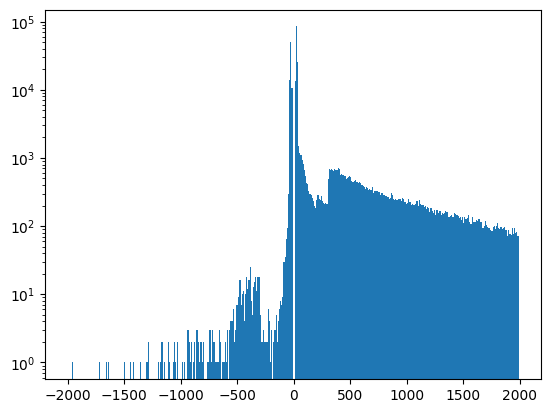

In [54]:
results.resetCuts()
Nab.plt.hist(results.data()['energy'], bins = Nab.np.arange(-2000, 2000, 10))
Nab.plt.yscale('log')
Nab.plt.show()

In [17]:
results.defineCut?

Object `results.defineCut` not found.


In [30]:
results.resetCuts()
results.defineCut('energy', '>', 300)
results.defineCut('t0', 'between', 3000, 4000)
singles.resetCuts()
singles.defineCut('custom', results.returnCut())
goodWaves = singles.waves()

In [43]:
goodWaves

dask.array<astype, shape=(53945, 7000), dtype=float32, chunksize=(2100, 7000), chunktype=numpy.ndarray>

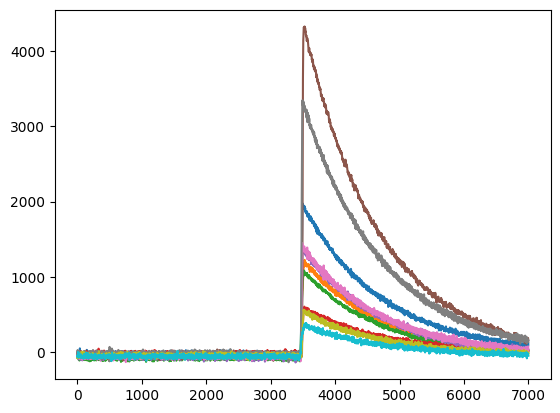

In [56]:
for i in range(10):
    Nab.plt.plot(goodWaves[i])
Nab.plt.show()

In [59]:
singles.resetCuts()

In [62]:
singles.headers()

,result,bc,timestamp,req,event type,hit type,blank,eventid,checksum,board,channel,unix timestamp,pixel
185,1,172,2823184779056,2823197512356,0,0,0,2095,1067881614,21,4,4.225448e+17,1051
186,1,153,2823185086634,2823197515982,0,0,0,2096,3953678921,19,1,4.225448e+17,1061
297,1,163,2823194379660,2823202251430,0,0,0,2411,640122712,20,3,4.225448e+17,1049
299,1,149,2823194445020,2823202265570,0,0,0,2413,4069458123,18,5,4.225448e+17,1085
345,1,55,2823196606968,2823204297016,0,0,0,2520,2693024966,6,7,4.225448e+17,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265341,1,159,2831478842964,2831482805492,0,0,0,357481,632781527,19,7,4.225448e+17,1063
265342,1,217,2831478947902,2831482797596,0,0,0,357483,459125848,27,1,4.225448e+17,1082
265343,1,211,2831479098726,2831482806114,0,0,0,357484,3395580413,26,3,4.225448e+17,1065
265344,1,189,2831479214732,2831482810110,0,0,0,357485,2093666155,23,5,4.225448e+17,1052


In [114]:
data = singles.waves()

In [118]:
%timeit data[0]

120 µs ± 282 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [120]:
%timeit data[0:1000]

130 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [122]:
%timeit data[0:10000]

133 µs ± 253 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
for i in range(100):
    wave = data[i].compute()

In [127]:
data = singles.waves()
for block in data.blocks:
    print(block.shape)

(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(9216, 7000)
(7771, 7000)


[0 1 0 0 1 1 0 2 0 0 1 0 0 0 1 0 0 0 1 1 2 1 1 2 2 1 1 2 1 2 2 1 2 1 1 1 1
 1 2 2 2 0 1 2 0 0 0 2 2 1 1 0 0 1 0 0 1 1 1 1 1 1 0 2 1 1 2 1 0 1 1 0 1 0
 0 0 0 0 1 2 1 0 1 2 1 2 2 1 0 1 0 1 1 0 1 2 0 1 2 2]
(100,)


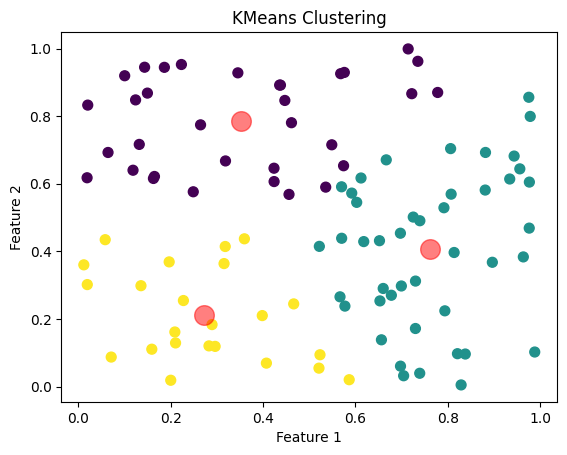

In [32]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 2)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
print(y_kmeans.shape)

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

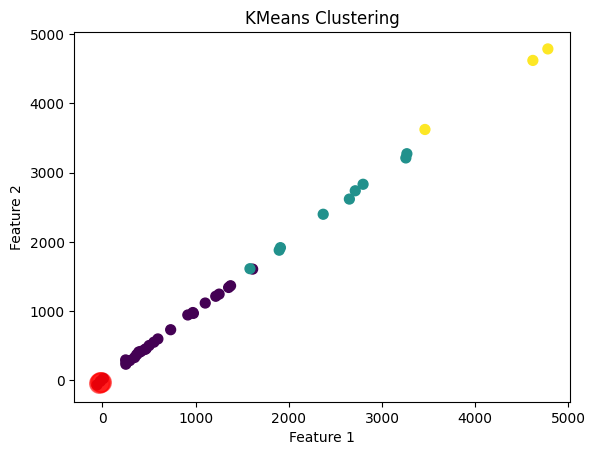

In [52]:
X = goodWaves[0:40] #waveforms with energy greater than 300 and t0 between 3000 and 4000
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the data points and cluster centers
plt.scatter(X[:, 3500], X[:, 3501], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

In [45]:
print(centers)

[[-3.6035713e+01 -3.7464287e+01 -4.0357143e+01 ...  1.4642944e+00
  -1.0713959e-01 -1.1071510e+00]
 [-2.6111111e+01 -2.7555557e+01 -2.3111111e+01 ...  1.3055557e+02
   1.2744444e+02  1.2499999e+02]
 [-2.0000000e+01 -2.3666666e+01 -3.0666666e+01 ...  2.3100000e+02
   2.2633334e+02  2.1900003e+02]]


In [46]:
X

dask.array<getitem, shape=(40, 7000), dtype=float32, chunksize=(40, 7000), chunktype=numpy.ndarray>

In [48]:
y_kmeans

array([1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0], dtype=int32)